In [ ]:
# You can get more datasets here https://repository.cloudlab.zhaw.ch/artifactory/deepscores/archives/2017/

!wget https://grfia.dlsi.ua.es/primus/packages/CameraPrIMuS.tgz
!wget https://raw.githubusercontent.com/OMR-Research/tf-end-to-end/master/Data/vocabulary_semantic.txt
!wget https://raw.githubusercontent.com/OMR-Research/tf-end-to-end/master/Data/train.txt
!wget https://raw.githubusercontent.com/OMR-Research/tf-end-to-end/master/Data/test.txt

--2021-04-11 03:24:36--  https://grfia.dlsi.ua.es/primus/packages/CameraPrIMuS.tgz
Resolving grfia.dlsi.ua.es (grfia.dlsi.ua.es)... 193.145.231.49
Connecting to grfia.dlsi.ua.es (grfia.dlsi.ua.es)|193.145.231.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2436130024 (2.3G) [application/x-gzip]
Saving to: ‘CameraPrIMuS.tgz’

CameraPrIMuS.tgz     12%[=>                  ] 297.68M  9.69MB/s    eta 3m 15s 

In [ ]:
!tar -xvf CameraPrIMuS.tgz 
#!tar -xvf primusCalvoRizoAppliedSciences2018.tgz 

Streaming output truncated to the last 5000 lines.
Corpus/000135183-1_2_1/000135183-1_2_1_distorted.jpg
Corpus/000135183-1_2_1/000135183-1_2_1.agnostic
Corpus/190011116-1_1_1/
Corpus/190011116-1_1_1/regular_pae.pae
Corpus/190011116-1_1_1/190011116-1_1_1_distorted.jpg
Corpus/190011116-1_1_1/190011116-1_1_1.png
Corpus/190011116-1_1_1/190011116-1_1_1.semantic
Corpus/190011116-1_1_1/190011116-1_1_1.agnostic
Corpus/190011116-1_1_1/190011116-1_1_1.mei
Corpus/100030635-1_2_1/
Corpus/100030635-1_2_1/100030635-1_2_1_distorted.jpg
Corpus/100030635-1_2_1/regular_pae.pae
Corpus/100030635-1_2_1/100030635-1_2_1.mei
Corpus/100030635-1_2_1/100030635-1_2_1.png
Corpus/100030635-1_2_1/100030635-1_2_1.agnostic
Corpus/100030635-1_2_1/100030635-1_2_1.semantic
Corpus/000114938-1_1_1/
Corpus/000114938-1_1_1/regular_pae.pae
Corpus/000114938-1_1_1/000114938-1_1_1.semantic
Corpus/000114938-1_1_1/000114938-1_1_1.png
Corpus/000114938-1_1_1/000114938-1_1_1.mei
Corpus/000114938-1_1_1/000114938-1_1_1_distorted.jpg
Co

In [ ]:
import torch, torchvision, PIL, numpy as np
import pathlib
import PIL
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import csv
import pandas as pd
import pdb
import numpy as np
import cv2
import random
from tqdm.auto import tqdm
import pdb

In [ ]:
class MusicClassificationObject:

  def __init__(self, dataset_dir, dataset_filenames, dictionary_path, transform=None, label_transform=None, distortions=False):
        self.distortions = distortions
        self.dataset_dir = dataset_dir
        self.transform = transform 
        self.label_transform = label_transform

        dataset_filenames = open(dataset_filenames,'r')
        dataset_list = dataset_filenames.read().splitlines()
        dataset_filenames.close()

        self.current_idx = 0
        # Dictionary
        self.symbol2index = {}
        self.index2symbol = {}
            
        dict_file = open(dictionary_path,'r')
        dict_list = dict_file.read().splitlines()
        word_idx = 0
        for word in dict_list:
          self.symbol2index[word] = word_idx
          self.index2symbol[word_idx] = word
          word_idx += 1 

        dict_file.close()

        self.dataset = self.createDataset(dataset_list)
        self.vocabulary_size = len(self.symbol2index)
  
  def createDataset(self, dataset_list):
    dataset = []
    i = 0
    for sample in dataset_list:
      sample_filepath = self.dataset_dir + '/' + sample + '/' + sample
      sample_semantic = sample_filepath + '.semantic'
      sample_gt_file = open(sample_semantic, 'r')
      sample_gt_plain = sample_gt_file.readline().split()
      sample_gt_file.close()
      # (img file name, all the notations sequentially related to the file)
      dataset.append((sample_filepath + '.png', [self.symbol2index[lab] for lab in sample_gt_plain]))
    return dataset

  def __len__(self):
    return len(self.dataset)
  
  def __getitem__(self, i):
    if torch.is_tensor(i):
        i = i.item()
    imgfn, label = self.dataset[i]
    img = PIL.Image.open(imgfn)
    if self.transform:
        img = self.transform(img)
    return (img.type(torch.FloatTensor), torch.tensor(label))


In [ ]:
img_height = 32
xform = torchvision.transforms.Compose([torchvision.transforms.Resize(img_height), torchvision.transforms.ToTensor()])
music_dataset = MusicClassificationObject('Corpus', 'train.txt', 'vocabulary_semantic.txt', xform)

In [ ]:
music_dataset[60]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 tensor([  10,  231, 1757,  844,    0, 1470,  441, 1646, 1454, 1210,    0, 1461,
          823,  823,    0, 1036, 1225, 1470,    0, 1470, 1225, 1663,    0]))

In [ ]:
def show_img(sample, title=None):
    img = sample
    if torch.is_tensor(img):
        img = img.cpu().permute(1,2,0)
    plt.imshow(img[:,:,0])
    if title:
        plt.title(title) # add color='w' arg if using a dark background
    plt.axis('off')

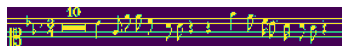

In [ ]:
show_img(music_dataset[0][0])

In [ ]:
def data_processing(data):
  max_image_width = 1000
  img_channels = 1  
  img_height = 32
  image_batches = []
  input_lengths = []
  label_lengths = []
  labels = []
  # Pads the given dataset. 
  for sample, label in data:
    batch_image = torch.ones([img_channels, img_height, max_image_width]).type(torch.FloatTensor)*0
    batch_image[0, :sample.shape[1], :sample.shape[2]] = sample

    label_lengths.append(len(label))
    input_lengths.append(sample.squeeze(0).shape[0]//2)
    image_batches.append(batch_image)
    labels.append(label)
  
  image_batches = nn.utils.rnn.pad_sequence(image_batches, batch_first=True)
  labels = nn.utils.rnn.pad_sequence(labels, batch_first=True)

  return image_batches, labels, input_lengths, label_lengths

In [ ]:
n_all_det = len(music_dataset)
n_used_det = int(1 * n_all_det)
n_train_det = int(0.8 * n_used_det)
n_test_det = n_used_det - n_train_det
rng_det = torch.Generator().manual_seed(291)
dataset_train, dataset_test, _ = torch.utils.data.random_split(music_dataset, [n_train_det, n_test_det, n_all_det-n_train_det-n_test_det], rng_det)

train_loader = torch.utils.data.DataLoader(dataset=dataset_train,
                                batch_size=16,
                                shuffle=True,
                                collate_fn=lambda x: data_processing(x))
test_loader = torch.utils.data.DataLoader(dataset=dataset_test,
                                batch_size=16,
                                shuffle=False,
                                collate_fn=lambda x: data_processing(x))

In [ ]:
import torch.nn as nn

# Taken from https://github.com/meijieru/crnn.pytorch

class BidirectionalLSTM(nn.Module):

    def __init__(self, nIn, nHidden, nOut):
        super(BidirectionalLSTM, self).__init__()

        self.rnn = nn.LSTM(nIn, nHidden, bidirectional=True)
        self.embedding = nn.Linear(nHidden * 2, nOut)

    def forward(self, input):
        recurrent, _ = self.rnn(input)
        T, b, h = recurrent.size()
        t_rec = recurrent.view(T * b, h)

        output = self.embedding(t_rec)  # [T * b, nOut]
        output = output.view(T, b, -1)

        return output


class CRNN(nn.Module):

    def __init__(self, imgH, nc, nclass, nh, n_rnn=2, leakyRelu=False):
        super(CRNN, self).__init__()
        assert imgH % 16 == 0, 'imgH has to be a multiple of 16'

        ks = [3, 3, 3, 3, 3, 3, 2]
        ps = [1, 1, 1, 1, 1, 1, 0]
        ss = [1, 1, 1, 1, 1, 1, 1]
        nm = [64, 128, 256, 256, 512, 512, 512]

        cnn = nn.Sequential()

        def convRelu(i, batchNormalization=False):
            nIn = nc if i == 0 else nm[i - 1]
            nOut = nm[i]
            cnn.add_module('conv{0}'.format(i),
                           nn.Conv2d(nIn, nOut, ks[i], ss[i], ps[i]))
            if batchNormalization:
                cnn.add_module('batchnorm{0}'.format(i), nn.BatchNorm2d(nOut))
            if leakyRelu:
                cnn.add_module('relu{0}'.format(i),
                               nn.LeakyReLU(0.2, inplace=True))
            else:
                cnn.add_module('relu{0}'.format(i), nn.ReLU(True))

        convRelu(0)
        cnn.add_module('pooling{0}'.format(0), nn.MaxPool2d(2, 2))  # 64x16x64
        convRelu(1)
        cnn.add_module('pooling{0}'.format(1), nn.MaxPool2d(2, 2))  # 128x8x32
        convRelu(2, True)
        convRelu(3)
        cnn.add_module('pooling{0}'.format(2),
                       nn.MaxPool2d((2, 2), (2, 1), (0, 1)))  # 256x4x16
        convRelu(4, True)
        convRelu(5)
        cnn.add_module('pooling{0}'.format(3),
                       nn.MaxPool2d((2, 2), (2, 1), (0, 1)))  # 512x2x16
        convRelu(6, True)  # 512x1x16

        self.cnn = cnn
        self.rnn = nn.Sequential(
            BidirectionalLSTM(512, nh, nh),
            BidirectionalLSTM(nh, nh, nclass)
      
            )

    def forward(self, input):
        # conv features
        conv = self.cnn(input)
        b, c, h, w = conv.size()
        assert h == 1, "the height of conv must be 1"
        conv = conv.squeeze(2)
        conv = conv.permute(2, 0, 1)  # [w, b, c]

        # rnn features
        output = self.rnn(conv)

        return output

In [ ]:
model = CRNN(img_height, 1, music_dataset.vocabulary_size + 1, 256)

#torch.nn.init.xavier_uniform_(torch.empty(256,256))
device = torch.device('cuda:0')
model.to(device)

CRNN(
  (cnn): Sequential(
    (conv0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu0): ReLU(inplace=True)
    (pooling0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu1): ReLU(inplace=True)
    (pooling1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchnorm2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU(inplace=True)
    (conv3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu3): ReLU(inplace=True)
    (pooling2): MaxPool2d(kernel_size=(2, 2), stride=(2, 1), padding=(0, 1), dilation=1, ceil_mode=False)
    (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchnorm4): BatchNorm2d(512, eps=1e-05, momentum=0.

In [ ]:
criterion = torch.nn.CTCLoss(zero_infinity=True)
optimizer = torch.optim.Adadelta(model.parameters(), lr = 0.1)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [ ]:
def run_test(model, criterion, no_preds=False):
    nsamples_test = len(dataset_test)
    loss = 0
    sample = None
    model.eval()
    with torch.no_grad():
        for _data in test_loader:
            music_sheet_samples, labels, input_lengths, label_lengths = _data
            music_sheet_samples = music_sheet_samples.to(device)
            labels = labels.to(device)

            output = model(music_sheet_samples)
            if sample is None:
              sample = output
            output = torch.nn.functional.log_softmax(output, dim=2)
            #if not no_preds:
            #    preds += output.cpu().unbind()

            loss += criterion(output, labels, input_lengths, label_lengths) * music_sheet_samples.size(0)

    return loss / nsamples_test, sample

def run_train(model, criterion, opt, sched):
    nsamples_train = len(dataset_train)
    loss_sofar = 0
    model.train()
    with torch.enable_grad():
        for _data in tqdm(train_loader, desc='iters', leave=False):
            music_sheet_samples, labels, input_lengths, label_lengths = _data
            music_sheet_samples = music_sheet_samples.to(device)
            labels = labels.to(device)

            opt.zero_grad()

            output = model(music_sheet_samples)
            output = torch.nn.functional.log_softmax(output, dim=2)
          
            loss = criterion(output, labels, input_lengths, label_lengths)
            loss.backward()

            opt.step()
            loss_sofar += loss.item() * music_sheet_samples.size(0)

    sched.step()
    return loss_sofar / nsamples_train

def run_all(model, criterion, optimizer, scheduler, n_epochs):
    for epoch in tqdm(range(n_epochs), desc='epochs'):
        loss_train = run_train(model, criterion, optimizer, scheduler)
        loss_test, preds = run_test(model, criterion, no_preds=True)
        tqdm.write(f"epoch {epoch+1}: train loss {loss_train:.4f}, test loss {loss_test:.4f}")
    return preds

In [ ]:
output = run_all(model, criterion, optimizer, scheduler, 10)

epoch 1: train loss 0.3945, test loss 0.5466


epoch 2: train loss 0.3525, test loss 0.3584


epoch 3: train loss 0.3476, test loss 0.3657


epoch 4: train loss 0.3395, test loss 0.4211


epoch 5: train loss 0.3334, test loss 0.4216


epoch 6: train loss 0.3214, test loss 0.3644


epoch 7: train loss 0.3159, test loss 0.3763


epoch 8: train loss 0.3121, test loss 0.4344


epoch 9: train loss 0.3092, test loss 0.3957


epoch 10: train loss 0.3058, test loss 0.3711



In [ ]:
def show_img_output(sample, title=None):
    img = sample
    if torch.is_tensor(img):
        img = img.cpu().permute(0,1)
    plt.imshow(img[:,:], aspect='auto')
    if title:
        plt.title(title) # add color='w' arg if using a dark background
    plt.axis('off')

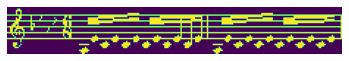

In [ ]:
show_img(music_dataset[27][0])

In [ ]:
output.shape

torch.Size([251, 16, 1781])